In [1]:
import sys,os
sys.path.append('../..')
from backtester import matlab, backtester
from backtester.analysis import *
import pandas as pd
import numpy as np
import scipy

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
strategyname = 'strategy_270225'
d, info = matlab.loaddata('../../mat/'+strategyname+'.mat')


In [3]:
d_slice=d.ix['2000':]

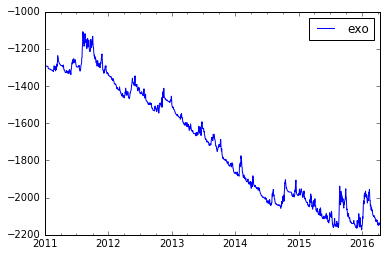

In [4]:
d_slice.plot()

In [5]:
info

{'legs': 4,
 'name': 'BearishCollarBrokenWing',
 'pcf': array([1, 2, 0, 1], dtype=uint8),
 'pcfqty': array([-1, -1,  1,  1], dtype=int16),
 'tickincrement': 0.25,
 'tickvalue': 12.5,
 'underlying': 'EP'}

# Simple entry and exit rules based on MA crossing

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=15).mean()
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()


{'count': 44, 'netprofit': 127.75000000000136, 'std': 34.460897467814021, 'avg': 2.9034090909091219, 'winrate': 0.6136363636363636, 'maxdd': -295.14999999999964}


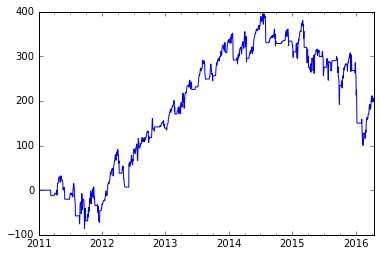

In [7]:
#Defining entry\exit rules
slow_ma = pd.rolling_mean(d_slice.exo, 15)
fast_ma = pd.rolling_mean(d_slice.exo, 10)


short_entry = CrossDown(fast_ma, slow_ma)
short_exit = (CrossUp(fast_ma, slow_ma)) 

direction = -1
pl, inposition = backtester.backtest(d_slice, short_entry, short_exit, direction )
equity, stats = backtester.stats(pl, inposition)


print(stats)
equity.plot()

# Trailing stop exploration

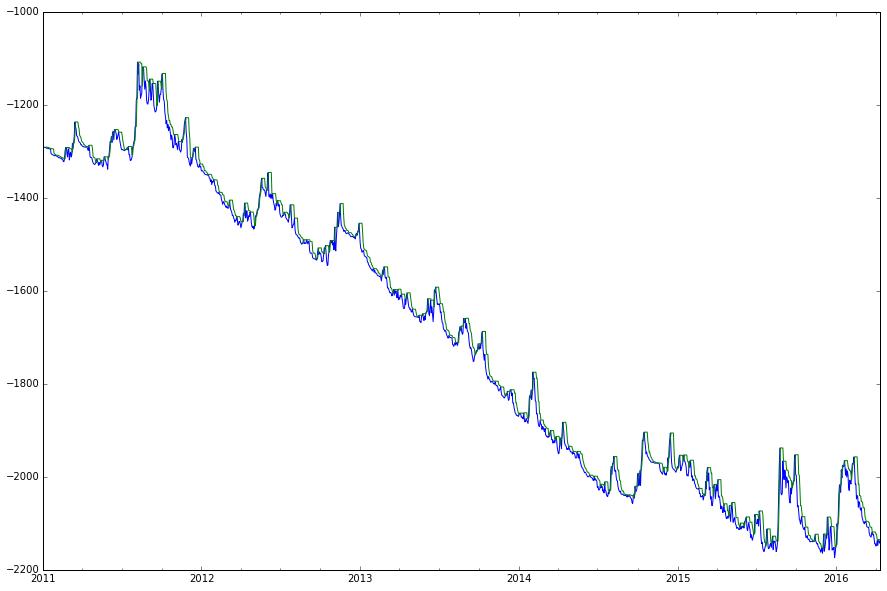

In [447]:
figsize(15, 10)


#Trailing stop works better on trending markets.
#On markets where mean-reversion regime prevails, TS will not performing well.
#We need to determine size of TS according to underlying volatility. It will help us to not lose too much on volatility bursts

#Rolling max\min works quite well for raw exploration. Period of rolling window is a subject of optimization
period=5
trailing_stop_short = pd.rolling_max(d_slice.exo,period).shift(1)
trailing_stop_long = pd.rolling_min(d_slice.exo, period).shift(1)

#Simple vola metric. Based on previous px change
# Median smoothing unlike averaging, is less resposive to volatility busts
# I think is will be more useful in our case
volatility_metric=abs(pd.rolling_median(d_slice.exo.shift(1)-d_slice.exo.shift(2),10))

d_slice.exo.plot()

#slow_ma.plot(c='r')
#fast_ma.plot(c='g')

trailing_stop_short.plot()

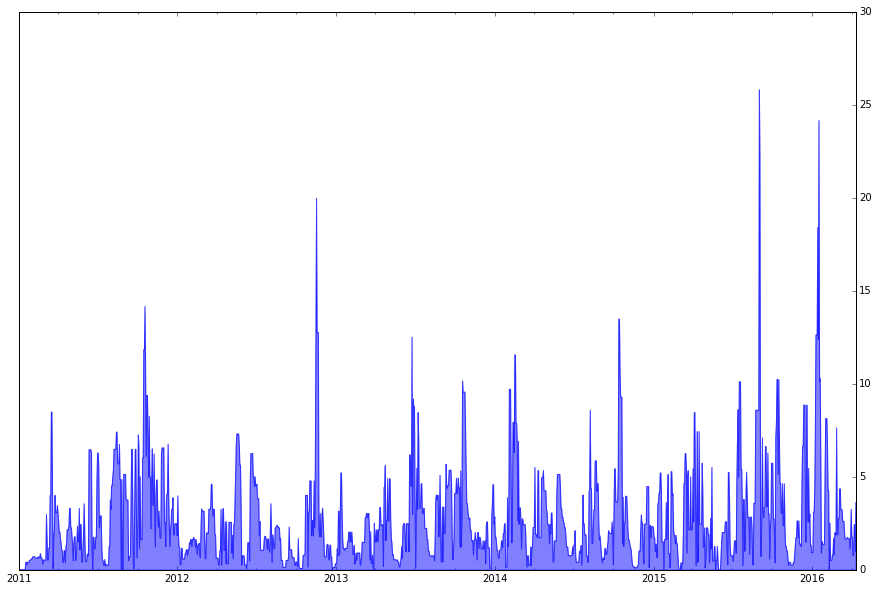

In [448]:
volatility_metric.plot(secondary_y=True,kind='area',stacked=False)

# Optimizing

In [432]:
#We're going to optimize period of rolling windows and compare system perfomance  results
#Index of DF is optimizing parameter value

results_a=[]
results_index_a=[]
for p in range(5,200,5):
    optimizing_period=p
    trailing_stop_short = pd.rolling_max(d_slice.exo,optimizing_period).shift(1)

    short_entry = CrossDown(fast_ma, slow_ma)
    short_exit = (CrossUp(fast_ma, slow_ma)) | (CrossUp(d_slice.exo,trailing_stop_short))

    direction = -1
    pl, inposition = backtester.backtest(d_slice, short_entry, short_exit, direction )
    equity, stats = backtester.stats(pl, inposition)

    #print(stats)
    
    '''
    results_df['std']=stats['std']
    results_df['maxdd']=stats['maxdd']
    results_df['count']=stats['count']
    results_df['avg']=stats['avg']
    results_df['netprofit']=stats['netprofit']
    results_df['winrate']=stats['winrate']
    '''
    results_a.append(stats)
    results_index_a.append(p)


In [433]:
results_df=pd.DataFrame(results_a,index=results_index_a)

In [437]:
results_df.sort(['netprofit'],ascending=False)

,avg,count,maxdd,netprofit,std,winrate
5,6.570213,47,-107.75,308.80,22.878097,0.617021
40,3.500000,44,-253.20,228.45,32.399434,0.613636
20,3.468182,44,-306.35,227.05,34.224687,0.613636
15,3.448864,44,-327.50,226.20,35.466052,0.613636
55,3.300000,44,-262.00,219.65,32.175818,0.613636
50,3.300000,44,-262.00,219.65,32.175818,0.613636
45,3.300000,44,-262.00,219.65,32.175818,0.613636
60,3.300000,44,-262.00,219.65,32.175818,0.613636
180,2.903409,44,-295.15,202.20,34.460897,0.613636
185,2.903409,44,-295.15,202.20,34.460897,0.613636


[-12.35   1.15 -21.3  -26.2   11.05  30.75 -26.1  -20.75  38.25 -22.45  22.
   5.75  55.85  -5.75  13.75   4.95  19.45   4.45   4.15  49.6    6.5
  -7.45  12.75   5.75  30.85  18.4   59.8   21.65  18.1   10.9  -10.35
  11.35  15.45  -8.8  -13.   -28.6  -10.8   -2.    -1.5    3.4    4.35
   5.3  -35.5   46.85  -8.   -16.25  53.4 ]
{'std': 22.878096603739767, 'maxdd': -107.74999999999955, 'count': 47, 'avg': 6.5702127659574696, 'netprofit': 308.80000000000109, 'winrate': 0.6170212765957447}


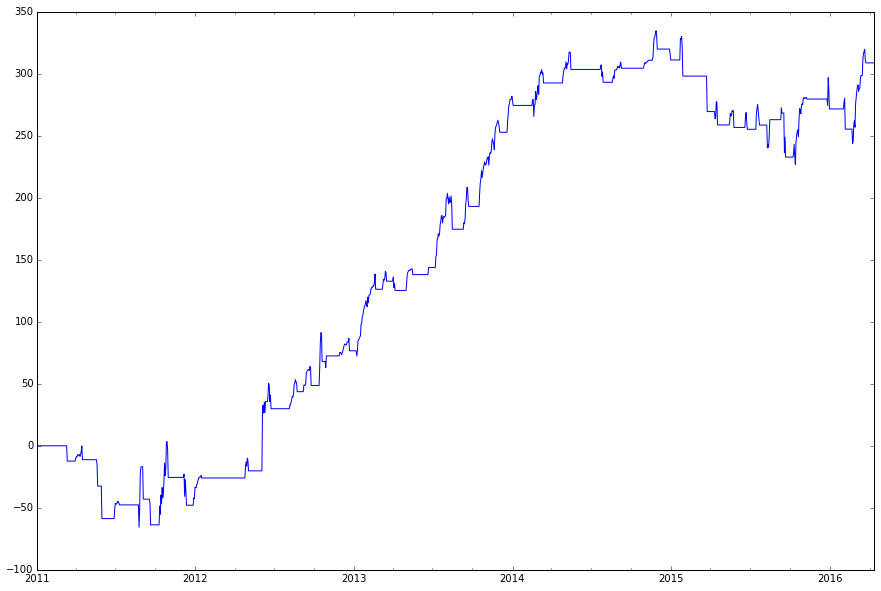

In [443]:
optimizing_period=5
trailing_stop_short = pd.rolling_max(d_slice.exo,optimizing_period).shift(1)

short_entry = CrossDown(fast_ma, slow_ma)
short_exit = (CrossUp(fast_ma, slow_ma)) | (CrossUp(d_slice.exo,trailing_stop_short))

direction = -1
pl, inposition = backtester.backtest(d_slice, short_entry, short_exit, direction )
equity, stats = backtester.stats(pl, inposition)

print(stats)
equity.plot()    

#Seems good

In [8]:
#We're going to optimize period of rolling windows, size of TS and compare system perfomance  results
#Index of DF is optimizing parameter value

results_a=[]
results_index_a=[]

for p in range(5,200,5):
    optimizing_period=p
    trailing_stop_short = pd.rolling_max(d_slice.exo,optimizing_period).shift(1)
    
    
    for v in np.arange(0,2,0.1):
        vola_adjustment=v
        trailing_stop_dynamicsize_short=trailing_stop_short+vola_adjustment
        short_entry = CrossDown(fast_ma, slow_ma)
        short_exit = (CrossUp(fast_ma, slow_ma)) | (CrossUp(d_slice.exo,trailing_stop_short))

        direction = -1
        pl, inposition = backtester.backtest(d_slice, short_entry, short_exit, direction )
        equity, stats = backtester.stats(pl, inposition)

        #print(stats)

        '''
        results_df['std']=stats['std']
        results_df['maxdd']=stats['maxdd']
        results_df['count']=stats['count']
        results_df['avg']=stats['avg']
        results_df['netprofit']=stats['netprofit']
        results_df['winrate']=stats['winrate']
        '''
        results_a.append(stats)
        results_index_a.append(p)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).max()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).max()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=15).max()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).max()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_max is deprecated for Series and will be removed in a future version, r